Trying out CIRF-10 data set for our project of Real vs AI-generated image detection

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize for CIFAR-10
])

In [18]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [23]:
def unnormalize(img):
    img = img * 0.5 + 0.5  # Undo the normalization (which was normalized by 0.5 mean, 0.5 std)
    return img

In [24]:
def imshow(img):
    # Convert tensor to numpy array and transpose it for display
    img = unnormalize(img)
    npimg = img.numpy().transpose((1, 2, 0))
    npimg = np.clip(npimg, 0, 1)  # Unnormalize for proper display
    plt.imshow(npimg)
    plt.axis('off')
    plt.show()

In [25]:
def show_few_images(images, num_to_show=2):
    # Select only a subset of the images (e.g., first 'num_to_show' images)
    selected_images = images[:num_to_show]  # Select first few images

    # Create a grid with the selected images
    imshow(torchvision.utils.make_grid(selected_images))

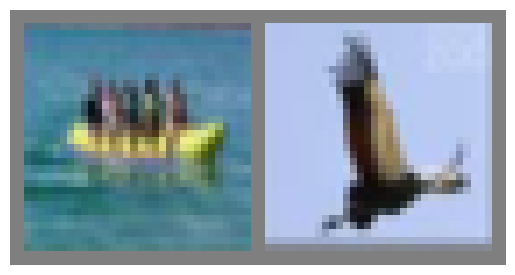

In [26]:
# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show only the first 2 images from the batch
show_few_images(images, num_to_show=2)

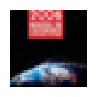

In [28]:
def show_original_image(img):
    img = unnormalize(img)  # Unnormalize the image
    npimg = img.numpy().transpose((1, 2, 0))  # Convert tensor to numpy array and transpose
    npimg = np.clip(npimg, 0, 1)  # Ensure values are in the range [0, 1]

    plt.figure(figsize=(1, 1))  # Set figure size to 32x32 pixels
    plt.imshow(npimg, interpolation='nearest')  # Disable interpolation for sharp display
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show only the first image from the batch in its original 32x32 form
show_original_image(images[0])

In [31]:
train_images = trainset.data.reshape(trainset.data.shape[0], -1)
test_images = testset.data.reshape(testset.data.shape[0], -1)

combined_data = np.vstack((train_images, test_images))
df = pd.DataFrame(combined_data)

In [32]:
print(df.head())

   0     1     2     3     4     5     6     7     8     9     ...  3062  \
0    59    62    63    43    46    45    50    48    43    68  ...   104   
1   154   177   187   126   137   136   105   104    95   102  ...   136   
2   255   255   255   253   253   253   253   253   253   253  ...    79   
3    28    25    10    37    34    19    38    35    20    42  ...    38   
4   170   180   198   168   178   196   177   185   203   183  ...    78   

   3063  3064  3065  3066  3067  3068  3069  3070  3071  
0   216   184   140   151   118    84   123    92    72  
1   143   133   139   143   134   142   143   133   144  
2    78    85    83    79    85    83    80    86    84  
3    54    47    28    63    56    37    72    65    46  
4    75    79    82    71    75    78    73    77    80  

[5 rows x 3072 columns]


Using the CIFAR-10 dataset for differentiating between AI-generated images and real images may not be ideal due to its low resolution (32x32 pixels) and limited diversity.